In [12]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
from numpy import *
data = pd.read_csv("./project1_dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   algorithm                770 non-null    object 
 1   RQ                       770 non-null    float64
 2   experiment_id            770 non-null    int64  
 3   iteration                770 non-null    int64  
 4   no_datapoints            770 non-null    int64  
 5   no_features              770 non-null    int64  
 6   preprocessing_energy(J)  770 non-null    float64
 7   preprocessing_time(s)    770 non-null    float64
 8   train_energy(J)          770 non-null    float64
 9   train_time(s)            770 non-null    float64
 10  predict_energy(J)        770 non-null    float64
 11  predict_time(s)          770 non-null    float64
 12  datatype                 770 non-null    object 
 13  accuracy                 770 non-null    float64
 14  precision                7

In [4]:
data.describe()

,RQ,experiment_id,iteration,no_datapoints,no_features,preprocessing_energy(J),preprocessing_time(s),train_energy(J),train_time(s),predict_energy(J),predict_time(s),accuracy,precision,recall,f1
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,2.200000,77.500000,2.000000,3634.000000,6497.863636,0.163545,1.432426,1.645532,1.915789,0.376777,1.506430,0.884809,0.450757,0.367347,0.401558
std,0.073903,44.483929,1.415133,556.779181,2421.142859,0.336114,0.049398,4.491485,0.779120,0.717242,0.092313,0.027118,0.300913,0.258745,0.274149
min,2.100000,1.000000,0.000000,1950.000000,816.000000,0.002733,1.360191,0.002427,1.351077,0.000000,1.394190,0.844498,0.000000,0.000000,0.000000
25%,2.100000,39.000000,1.000000,3900.000000,4901.000000,0.017287,1.391379,0.034140,1.404812,0.103242,1.446290,0.866627,0.000000,0.000000,0.000000
50%,2.200000,77.500000,2.000000,3900.000000,8169.000000,0.032391,1.402717,0.350018,1.588336,0.173308,1.465315,0.882775,0.584270,0.443946,0.510309
75%,2.300000,116.000000,3.000000,3900.000000,8169.000000,0.210727,1.485448,1.318985,2.064159,0.378884,1.526578,0.886364,0.600000,0.524327,0.553991
max,2.300000,154.000000,4.000000,3900.000000,8169.000000,3.830581,1.555510,51.902354,4.833060,8.715280,1.829258,0.973086,1.000000,0.860987,0.888889


In [10]:
df21 = data[data["algorithm"] == "SVM"]
df22 = df21[df21["RQ"] == 2.2]
x1 = df22['no_datapoints'].value_counts()
x2 = df22['no_features'].value_counts()
print(x1, x2)

3900    50
Name: no_datapoints, dtype: int64 3267    5
6535    5
2450    5
5718    5
1633    5
4901    5
8169    5
816     5
4084    5
7352    5
Name: no_features, dtype: int64


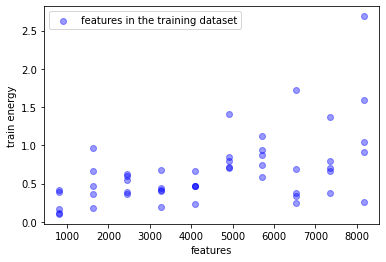

In [11]:
a = df21["no_features"][data["RQ"] == 2.2]
b = df21["train_energy(J)"][data["RQ"] == 2.2]
plt.scatter(a, b, c = 'blue', label = 'features in the training dataset', alpha=0.4)

plt.xlabel("features")
plt.ylabel("train energy")
plt.legend()
plt.show()

# REQUIREMENT 2

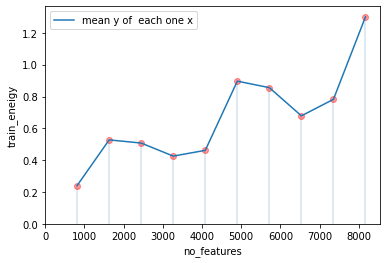

In [40]:
def getfirst(ls):
    return ls[0]
def scatterGTwoVar(data, xlabel ,ylabel, legend):
    '''
    @parameter
        data: list, tuple. data[0] is  dependent var. data[1] is  independent var.
              data must 
        norm: x,y need normlization ?
    
    '''
    dic = {key:[] for key in set(list(data[0]))}
    ls = []
    for i in range(len(list(data[0]))):
        dic[data[0].iloc[i]].append(data[1].iloc[i])
    for i in dic.keys():
        ls.append((i, mean(dic[i])))
    ls.sort(key = getfirst)
    x = [i[0] for i in ls]
    y = [i[1] for i in ls]
    for i in range(len(x)):
        plt.plot(x[i], y[i], 'o', c = 'red', alpha = 0.4)
        plt.vlines(x[i],ymin = 0 ,ymax = y[i],alpha = 0.2)
    plt.plot(x, y,label = legend )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(0)
    plt.ylim(0)
    plt.legend()
    plt.show()

a = df21["no_features"][data["RQ"] == 2.2]
b = df21["train_energy(J)"][data["RQ"] == 2.2]
scatterGTwoVar([a, b], xlabel = 'no_features', ylabel = 'train_eneigy', legend = 'mean y of  each one x')